In [4]:
import pandas as pd
import time
from datetime import datetime
from pandas import ExcelWriter 
pd.__version__




'1.0.3'

In [117]:
# temp=1588744463872/1000
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(temp))

'2020-05-06 13:54:39'

In [118]:
temp=1588744479826/1000
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(temp))

'2020-05-06 13:54:39'

In [ ]:
    # Total number of seconds between dates

In [111]:
class JTLReader:
    def __init__(self,jtlPath):
        self.jtlPath=jtlPath
        self.jtlColumns = ['timeStamp', 'elapsed','label','dataType','bytes','URL','allThreads','success','responseCode','responseMessage']
        %time self.df_Jtl=pd.read_csv(self.jtlPath,usecols=self.jtlColumns,dtype={'label':'category'})#dtype={'label':'category'},nrows=195222    
        self.shape=self.df_Jtl.shape
        self.rows=self.shape[0]
        self.rows
        """Conver Epoc time to Actual Time Start"""
        self.df_Jtl['timeStamp'] = pd.to_datetime(self.df_Jtl['timeStamp'],unit='ms')
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype('datetime64[s]')#reduce precision pandas timestamp dataframe
        self.df_Jtl['timeStamp']=self.df_Jtl['timeStamp'].dt.tz_localize('utc').dt.tz_convert('Singapore')
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype(str).str[:-6]
        self.df_Jtl['timeStamp'] = pd.to_datetime(self.df_Jtl['timeStamp'])
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype('datetime64[s]')
        """Conver Epoc time to Actual Time End"""
        
        """Filtering Subscriber Txn"""
        self.filt_Subscriber=(self.df_Jtl['label']=='iBORDETS_Subscribers')
        self.df_Jtl=self.df_Jtl.loc[~self.filt_Subscriber]
        """Filter Transaction Controller & HTTP Request"""
        self.filt=(pd.isnull(self.df_Jtl['URL'])) #& (pd.isnull(self.df_Jtl['dataType']))
        self.df_jtl_TC=self.df_Jtl.loc[self.filt]
        self.df_jtl_HTTPReqeust=self.df_Jtl.loc[~self.filt]
        """Error Handling To be updated"""
        self.error_filt=(self.df_jtl_HTTPReqeust['success']==False)
        self.df_HttpErrors=self.df_jtl_HTTPReqeust.loc[self.error_filt]
        
        
    
        
      
        
    """def getTransactionControllerData(self):
        print("Hello shiva")
        filt=(pd.isnull(self.df_Jtl['URL'])) & (pd.isnull(self.df_Jtl['dataType']))
        self.df_jtl_TC=self.df_Jtl.loc[filt]
        return self.df_jtl_TC"""
        

        
    def converTimeStamp(self):
        self.df_Jtl['timeStamp'] = pd.to_datetime(self.df_Jtl['timeStamp'],unit='ms')
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype('datetime64[s]')#reduce precision pandas timestamp dataframe
        self.df_Jtl['timeStamp']=self.df_Jtl['timeStamp'].dt.tz_localize('utc').dt.tz_convert('Singapore')
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype(str).str[:-6]
        self.df_Jtl['timeStamp'] = pd.to_datetime(self.df_Jtl['timeStamp'])
        self.df_Jtl['timeStamp'] = self.df_Jtl['timeStamp'].astype('datetime64[s]') 
        
    def ms_to_sec(self):
         self.df_Jtl['elapsed']=((self.df_Jtl['elapsed'])/1000)
        
        
    def overAllResponseTimeSummary(self):
        self.df_overAllResponseTimeSummary=self.df_jtl_TC[['timeStamp','elapsed']]
        return self.df_overAllResponseTimeSummary
       
    def listOfErrors(self):
        return self.df_Jtl['responseCode'].value_counts()
    
    def shapeOfDaraFrame(self):
        return self.df_Jtl.shape
    
    def columnType(self,columnName):
        self.columnName=columnName
        return self.df_Jtl[self.columnName].dtype
    
    def getPeriod(self):
        self.startTime=self.df_Jtl['timeStamp'][0]
        self.endRow=self.df_Jtl['timeStamp'].shape[0]
        self.endTime=self.df_Jtl['timeStamp'][self.endRow-1]
        return f'{self.startTime} : {self.endTime}'
    
    def getDuration(self):
        self.startTime= self.df_Jtl['timeStamp'][0]
        self.endRow= self.df_Jtl['timeStamp'].shape[0]
        self.endTime= self.df_Jtl['timeStamp'][self.endRow-1]#-1
        self.executionStartTime=datetime(self.startTime.year,self.startTime.month,self.startTime.day,self.startTime.hour,self.startTime.minute,self.startTime.second)
        self.executionEndTime=datetime(self.endTime.year,self.endTime.month,self.endTime.day,self.endTime.hour,self.endTime.minute,self.endTime.second)
        self.timeDiff = self.executionEndTime-self.executionStartTime
        self.duration_in_s = self.timeDiff.total_seconds()
        self.duration=time.strftime("%H:%M:%S", time.gmtime(self.duration_in_s))
        return self.duration
    
    def getMaxRunningVusers(self):
        self.allThread=self.df_Jtl['allThreads'].max()
        return self.allThread 
    
      
    def getTotalHits(self):
        return self.df_jtl_HTTPReqeust.shape[0]
    
    def getAvgHitsPerSecond(self):
        return self.df_jtl_HTTPReqeust.shape[0]/self.duration_in_s
    
    def getTotalThroughput(self):
        self.totalThroughput=self.df_jtl_TC['bytes'].sum()
        return self.totalThroughput
    
    def getAvgThroughputPerSecond(self):
        self.avgThroughput=(self.df_jtl_TC['bytes'].sum())/self.duration_in_s
        return self.avgThroughput
    
    def getTotalPassFailFreqList(self):
        self.passFail_freq=self.df_jtl_TC['success'].value_counts().to_frame()
        #self.passFailFrequencyeqList=self.passFail_freq.index.tolist()
        
        return self.passFail_freq      
    
    

    def getAnalysisSummary(self):
        self.period=self.getPeriod()
        self.duration=self.getDuration()
        self.maxRunningVusers=self.getMaxRunningVusers()
        self.totalThroughput=self.getTotalThroughput()
        self.avgThroughputPerSecond=self.getAvgThroughputPerSecond()
        self.totalHits=self.getTotalHits()
        self.avgHitsPerSecond=self.getAvgHitsPerSecond()
        
        self.df_AnalysisSummary=pd.DataFrame(
            {
                'Data':[
                        'Period','Duration','Maximum Running Vusers','Total bytes',
                        'Average bytes/second','TotalHits','Average Hits Per Second',
                        'Total Error','Total Pass','Total Failed'
                ],
                'Values':[
                            self.period,self.duration,self.maxRunningVusers,self.totalThroughput,
                            self.avgThroughputPerSecond,self.totalHits,self.avgHitsPerSecond,
                            'NA',self.getTotalPassFailFreqList(),'NA'
                ]
                
            }
        )
        return self.df_AnalysisSummary
    
    def responseTimeSummary(self):
        self.df_responseTimeSummary=self.df_jtl_TC[['label','elapsed']]
        self.df_txnGroup=self.df_responseTimeSummary.groupby(['label'],observed=True )  #observed=True      
        self.df_txnGroup=self.df_txnGroup['elapsed'].describe(percentiles=[.90])#self.df_txnGroup.describe(percentiles=[.90])
        self.df_txnGroup.columns=self.df_txnGroup.columns.get_level_values(0)#self.df_txnGroup.columns=self.df_txnGroup.columns.get_level_values(1)
        self.df_txnGroup = self.df_txnGroup[['count','min','mean','90%','max',]]
        self.df_txnGroup.rename(columns={'count':'#Samples','min':'Min','mean':'Average','90%':'90 Percentile','max':'Max'},inplace=True)
        ##self.df_txnGroup=self.df_txnErrorGroup.reset_index() """To be enable if you run describe () on data frame. Now we are running on specific column"""
        ##self.df_txnGroup['throughput']=self.df_txnGroup['count']/self.duration_in_s
        ##self.validTxn_filt=(self.df_txnGroup['count']>0)
        self.df_responseTimeSummaryOutput=self.df_txnGroup #self.df_txnGroup[self.validTxn_filt]
       
        return self.df_responseTimeSummaryOutput
    
    def getPassFailSummary(self):
        self.df_passFailSummary=self.df_jtl_TC[['label','success']]
        self.df_passFailGroup=self.df_passFailSummary.groupby(['label'],observed=True)#whe we use observed=True-->refer https://stackoverflow.com/questions/54922327/valueerror-operands-could-not-be-broadcast-together-with-shape-when-calling-pan?answertab=votes#tab-top
        self.df_txnGroup=self.df_passFailGroup['success'].value_counts()
        self.df_txnGroupSlice=self.df_txnGroup.loc[:,]
        self.df_passFailSummaryOutput=self.df_txnGroupSlice.unstack()
        self.df_passFailSummaryOutput=self.df_passFailSummaryOutput.fillna(0)
        self.df_passFailSummaryOutput.rename(columns={True:'Pass',False:'Fail'},inplace=True)
        return self.df_passFailSummaryOutput
        
    def getFinalResponseSummary(self):
        rs=pd.merge(self.df_responseTimeSummaryOutput,self.df_passFailSummaryOutput,left_index=True,right_index=True)
        if 'Fail' in rs.columns:# If transaction fail observed 
            rs['Error%']=((rs['Fail'])/(rs['#Samples']))*100 
            rs=rs[['#Samples','Pass','Fail','Error%','Min','Average','90 Percentile','Max']]#'Fail','Error%'
            return rs
        else:# All transactions pass
            rs=rs[['#Samples','Pass','Min','Average','90 Percentile','Max']]
            
            return rs
            
            
    
    def getRunnerVuserGraphData(self):
        '''T=min,S=Seconds'''       
        self.df_vusers=self.df_jtl_TC[['timeStamp','allThreads']]
        self.df_vusers.sort_values(by=['timeStamp'])
        self.df_vusers.set_index('timeStamp',inplace=True)
        self.df_vusers_summary = pd.DataFrame()
        self.df_vusers_summary['Vusers']=self.df_vusers['allThreads'].resample('1T').max()     
        return self.df_vusers_summary
         
        
    
    def getHitsPersecondGraphData(self):
        '''T=min,S=Seconds'''
        #self.df_jtl_HTTPReqeust['hits']=1
        self.df_hits=self.df_jtl_HTTPReqeust[['timeStamp','URL']]#self.df_jtl_HTTPReqeust[['timeStamp','hits']]
        self.df_hits.sort_values(by=['timeStamp'])
        self.df_hits.set_index('timeStamp',inplace=True)
        self.df_hits_summary = pd.DataFrame()
        self.df_hits_summary['hitsCount']=self.df_hits['URL'].resample('1T').count()     
        return self.df_hits_summary
        #return self.df_hits
    
    def getThrouhputPersecondGraphData(self):
        '''T=min,S=Seconds'''
        self.df_throughput=self.df_jtl_TC[['timeStamp','bytes']]
        self.df_throughput.sort_values(by=['timeStamp'])
        self.df_throughput.set_index('timeStamp',inplace=True)
        self.df_throughput_summary = pd.DataFrame()
        self.df_throughput_summary['Throughput']=self.df_throughput['bytes'].resample('1T').sum()     
        return self.df_throughput_summary
    
    def getOverallResponseTime(self):
        return self.df_jtl_TC[['timeStamp','elapsed','label']]
    
    def temp(self):
        self.slicer_grp=self.df_jtl_TC[['timeStamp','elapsed','label']]
        self.slicer_grp.sort_values(by=['timeStamp'])
        self.slicer_grp.set_index('timeStamp',inplace=True)
        self.df_response_summary_slicer = pd.DataFrame()
        self.df_slicer_txnGroup=self.slicer_grp.groupby(['label'],observed=True )
        self.df_response_summary_slicer=self.df_slicer_txnGroup['elapsed'].resample('30T').agg(['min','mean','max','count'])
        return self.df_response_summary_slicer
    
    def getResponseMessage(self):
         return self.df_HttpErrors
    
    def junk(self):
        #return  self.df_jtl_TC
        return self.df_jtl_HTTPReqeust
        #return  self.df_Jtl
        #return self.df_hits
    
      
obj1=JTLReader("C:\\Karthik\\03_Results\\03_Nov_2020_SmokeTest\\iBORDERS_TransactionTime.jtl") 
#obj1.converTimeStamp()
obj1.ms_to_sec() 
obj1.getDuration()



Wall time: 4.01 ms


'00:02:08'

In [116]:
#obj1.junk()

In [92]:
#y=obj1.getTotalPassFailFreqList()
#y

In [93]:
#x=obj1.temp()
#x

In [94]:
#obj1.df_Jtl

In [95]:
#obj1.df_jtl_HTTPReqeust

In [96]:
#obj1.df_jtl_TC

In [97]:
#obj1.getPeriod()

In [98]:
#obj1.getDuration()

In [99]:
#obj1.getMaxRunningVusers()

In [100]:
#obj1.getTotalThroughput()

In [112]:
analysisSummary=obj1.getAnalysisSummary()
analysisSummary


,Data,Values
0,Period,2020-11-03 13:54:03 : 2020-11-03 13:56:11
1,Duration,00:02:08
2,Maximum Running Vusers,2
3,Total bytes,39900
4,Average bytes/second,311.719
5,TotalHits,100
6,Average Hits Per Second,0.78125
7,Total Error,NA
8,Total Pass,success True 100
9,Total Failed,NA


In [113]:
#responseTimeSummary
responseTimeSummary=obj1.responseTimeSummary()
responseTimeSummary

,#Samples,Min,Average,90 Percentile,Max
label,,,,,
iBORDERS_Txn01_TransactionTime,100.0,218.0,274.94,311.0,472.0


In [114]:
passandfail=obj1.getPassFailSummary()
passandfail

success,Pass
label,
iBORDERS_Txn01_TransactionTime,100


In [115]:
rs=obj1.getFinalResponseSummary()
rs

,#Samples,Pass,Min,Average,90 Percentile,Max
label,,,,,,
iBORDERS_Txn01_TransactionTime,100.0,100,218.0,274.94,311.0,472.0


In [72]:
runningVuser=obj1.getRunnerVuserGraphData()
runningVuser

,Vusers
timeStamp,
2020-11-03 13:54:00,2
2020-11-03 13:55:00,2
2020-11-03 13:56:00,2


In [73]:
hitsPersecond=obj1.getHitsPersecondGraphData() 
hitsPersecond

,hitsCount
timeStamp,
2020-11-03 13:54:00,44
2020-11-03 13:55:00,47
2020-11-03 13:56:00,9


In [20]:
throughput=obj1.getThrouhputPersecondGraphData()
throughput

,Throughput
timeStamp,
2020-11-03 13:54:00,17556
2020-11-03 13:55:00,18753
2020-11-03 13:56:00,3591


In [21]:
#overAllResponseTimeSummary
overallResponseTime=obj1.getOverallResponseTime()
overallResponseTime

,timeStamp,elapsed,label
0,2020-11-03 13:54:03,329,iBORDERS_Txn01_TransactionTime
2,2020-11-03 13:54:04,398,iBORDERS_Txn01_TransactionTime
4,2020-11-03 13:54:05,228,iBORDERS_Txn01_TransactionTime
6,2020-11-03 13:54:07,268,iBORDERS_Txn01_TransactionTime
8,2020-11-03 13:54:08,331,iBORDERS_Txn01_TransactionTime
...,...,...,...
190,2020-11-03 13:56:06,300,iBORDERS_Txn01_TransactionTime
192,2020-11-03 13:56:07,287,iBORDERS_Txn01_TransactionTime
194,2020-11-03 13:56:08,260,iBORDERS_Txn01_TransactionTime
196,2020-11-03 13:56:10,232,iBORDERS_Txn01_TransactionTime


In [453]:
writer = ExcelWriter('JTL_Log_Analyser_Output.xlsx',mode='w')
#Write Analysis Summary to Excel
analysisSummary.to_excel(writer,sheet_name='AnalysisSummary')
#write response summary to excel with txn name,min,avg,max,90% & max
#rs.to_excel(writer,sheet_name='ResponseSummary')
#Write Running Vusers
runningVuser.to_excel(writer,sheet_name='RunningVuserSummary')
#Write Hits Summary
hitsPersecond.to_excel(writer,sheet_name='HitsSummary')
#Write Throughput Summary
throughput.to_excel(writer,sheet_name='ThroughputSummary')
#Write ResponseTime
overallResponseTime.to_excel(writer,sheet_name='ResponseTimeGraph')
writer.save()







In [79]:
responseMessage=obj1.getResponseMessage()
responseMessage
#responseMessage_grp=responseMessage.groupby('label',observed=True )
#errorSummary=responseMessage_grp['responseMessage'].value_counts()
#errorSummary.unstack()
#responseMessage=responseMessage.set_option('display.max_colwidth',1000)
#x=responseMessage[['label','responseMessage']]
#x.loc[227077,'responseMessage']

#responseMessage['responseMessage']
#'Non HTTP response message: Address already in use: connect'





,timeStamp,elapsed,label,responseCode,responseMessage,dataType,success,bytes,allThreads,URL
1,2020-11-03 13:54:03,329,iBORDERS_Txn01_TransactionTime-0,200,OK,text,False,399,2,http://192.168.161.120/iborders/sib/v1/transac...


NameError: name 'Throughput' is not defined

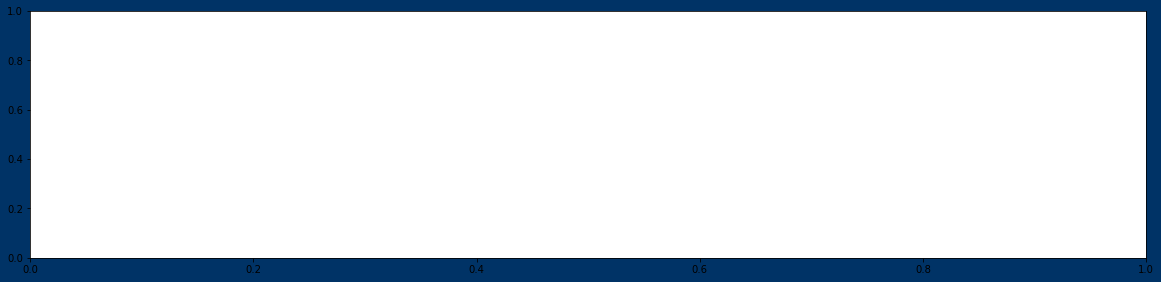

In [431]:
import random
import matplotlib.pyplot as plt
#from matplotlib import style
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
%matplotlib inline


#print(plt.style.available)
#print(plt.__file__)

#style.use('dark_background')
plt.rcParams['figure.figsize']=[25,18]
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('#003366')

# Add suplot syntax

ax1 = fig.add_subplot(211)

#To get data for x and y axis
x,y=Throughput.index,Throughput['Throughput']
#To rotate 
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(0)

#To print x axis with date and time
xfmt = mdates.DateFormatter('%H:%M:%S')#%d-%m-%y %H:%M:%S//ax.xaxis_date()
ax1.xaxis.set_major_formatter(xfmt)
ax1.fill_between(x,y,color="red",linewidth=5)#https://matplotlib.org/users/dflt_style_changes.html

# x and y label
ax1.set_xlabel('Time',fontsize=20,color='white')#alpha=0.3
ax1.set_ylabel('Throughput/sec',fontsize=20)
ax1.set_title('Throughput',fontsize=20,color='white')

#To drwa 4 lines with the desier colour : Top,Bottom,Left and Right
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')

#
ax1.xaxis.label.set_color('white')#"Time"
ax1.yaxis.label.set_color('white')#"HitsPerMin"

ax1.tick_params(axis='x', labelcolor='white',labelsize=20)#"%d-%m-%y %H:%M:%S"
ax1.tick_params(axis='y', labelcolor='white',labelsize=20)#"Hits Count: 10,20,30,40,50,60,70"

ax1.set_facecolor('#003366')#https://matplotlib.org/users/colors.html

##003366

ax1.grid(which='major', linestyle='-', linewidth='0.2', color='white')#17becf
#ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='red')

#ax1.set_yticks([0,1,2,3,4,5,6,7,8,9,10])
#ax1.set_xticks(['22:00:00','22:30:00','23:00:00','23:30:00','00:00:00',
               # '00:30:00','01:00:00','01:30:00','02:00:00','02:30:00',
               # '03:00:00','03:30:00','04:00:00','04:30:00'])
#ax.set_ylim((0, 6))
#ax.set_xlim()

#fig.savefig("E:\MaxUser.pdf",dpi=None,facecolor='#003366', edgecolor='#003366',bbox_inches='tight')
plt.show()